In [1]:
import requests
import json
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import re
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import shapely.wkt

%matplotlib inline

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/23'



headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [5]:
def concat_frames_columns_offpin(geo_response, response, date_range, time_range='9:00am-2:30pm', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

In [6]:
params = {
    'direction': '1',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '02-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '02-18-2022',
    'resolution': 'hiRes',
}

In [7]:
offpin_janfeb23 = concat_frames_columns_offpin(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '01/25/22 - 02/24/22')
offpin_janfeb23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.248905,5.686406,22.465,5.367,...,3.040,1.583,589,3.347,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.967159
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.453466,9.890090,8.641,4.030,...,1.553,1.042,601,1.661,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.986864
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.988925,12.503739,3.832,2.396,...,1.627,0.811,586,1.708,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.962233
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.932218,12.402327,7.280,2.432,...,1.459,1.243,587,1.538,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.963875
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,1.975114,12.344098,5.457,2.949,...,1.403,1.081,578,1.507,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.949097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,2.066550,11.148049,75.011,2.481,...,1.334,1.150,544,1.422,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.893268
672,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.634813,14.149631,3.063,1.984,...,1.326,1.094,561,1.420,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.921182
673,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.023116,11.993875,63.867,2.504,...,1.429,1.172,593,1.525,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.973727
674,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.952045,11.966425,46.865,2.510,...,1.346,1.166,554,1.425,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.909688


In [8]:
params = {
    'direction': '1',
    'startDate': '02-25-2022',
    'endDate' : '03-26-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'endDate' : '03-26-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'resolution': 'hiRes',
}

In [9]:
offpin_febmarch23 = concat_frames_columns_offpin(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '02/25/22 - 03/26/22')
offpin_febmarch23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,minSecs,numTrips,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.231582,5.709685,18.297,5.449,...,1.348,NaN,431,3.283,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.964206
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.392919,10.140335,7.752,3.867,...,1.267,NaN,442,1.657,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.988814
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.943722,12.794525,3.907,2.342,...,1.414,NaN,432,1.694,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.966443
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.955107,12.257130,7.741,2.513,...,1.242,NaN,430,1.538,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.961969
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.017792,12.083010,16.761,3.077,...,1.124,NaN,423,1.491,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.946309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.997818,11.531581,32.632,2.407,...,1.008,NaN,401,1.425,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.897092
671,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.624595,14.238626,6.359,1.912,...,1.013,NaN,410,1.414,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.917226
672,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,1.922599,12.620937,4.664,2.794,...,1.222,NaN,434,1.537,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.970917
673,"LINESTRING (-86.76385 36.21563, -86.76392 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.475,1.717429,14.250953,6.743,2.021,...,0.719,NaN,371,1.432,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.829978


In [10]:
params = {
    'direction': '1',
    'startDate': '03-27-2022',
    'endDate' : '04-26-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '04-14-2022,04-15-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '03-27-2022',
    'endDate' : '04-26-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '04-14-2022,04-15-2022',
    'resolution': 'hiRes',
}

In [11]:
offpin_marchapr23 = concat_frames_columns_offpin(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '03/27/22 - 04/26/22')
offpin_marchapr23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.488538,5.382822,19.348,5.754,...,3.160,1.853,546,3.552,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.976744
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.619150,9.264456,64.966,4.016,...,1.605,1.069,554,1.709,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.991055
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.992467,12.481512,4.691,2.387,...,1.631,0.880,548,1.715,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.980322
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,2.016397,11.884564,7.892,2.659,...,1.483,1.248,542,1.556,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.969589
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.143863,11.372462,9.772,3.142,...,1.469,1.149,539,1.578,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.964222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.671709,13.837337,3.130,2.041,...,1.356,1.158,519,1.435,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.928444
462,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.160562,11.230874,64.966,2.859,...,1.489,1.117,550,1.620,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.983900
463,"LINESTRING (-86.76409 36.21495, -86.76417 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.938,2.298350,10.850393,8.534,3.107,...,1.595,1.327,20,1.680,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.035778
464,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,2.098828,11.129545,64.186,2.470,...,1.411,1.081,524,1.515,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.937388


In [12]:
params = {
    'direction': '1',
    'startDate': '04-27-2022',
    'endDate' : '05-26-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '04-27-2022',
    'endDate' : '05-26-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'resolution': 'hiRes',
}

In [13]:
offpin_aprmay23 = concat_frames_columns_offpin(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '04/27/22 - 05/26/22')
offpin_aprmay23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.219112,5.726560,17.771,5.458,...,3.044,2.322,578,3.288,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.984668
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.645051,9.173736,107.014,4.022,...,1.553,1.248,584,1.675,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.994889
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.021503,12.302233,4.339,2.421,...,1.654,1.396,569,1.733,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.969336
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.965855,12.190116,7.449,2.416,...,1.494,1.269,565,1.561,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.962521
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.202542,11.069482,20.891,3.521,...,1.502,1.227,566,1.612,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.964225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.964943,11.724513,7.364,2.466,...,1.394,1.133,545,1.487,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.928450
442,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.694969,13.647447,3.695,2.060,...,1.351,0.974,547,1.449,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.931857
443,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.103692,11.534483,11.861,2.949,...,1.495,1.099,578,1.615,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.984668
444,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.894015,12.333060,6.910,2.350,...,1.405,1.149,546,1.493,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.930153


In [14]:
params = {
    'direction': '1',
    'startDate': '05-26-2022',
    'endDate' : '06-25-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '05-30-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '05-26-2022',
    'endDate' : '06-25-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '05-30-2022',
    'resolution': 'hiRes',
}

In [15]:
offpin_mayjune23 = concat_frames_columns_offpin(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '05/26/22 - 06/25/22')
offpin_mayjune23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.196749,5.757075,16.959,5.499,...,2.964,1.315,565,3.220,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.977509
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.678051,9.060694,70.526,4.099,...,1.536,1.175,574,1.693,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.993080
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.008485,12.381969,3.965,2.407,...,1.653,1.416,561,1.732,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.970588
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,2.192573,10.929625,50.188,3.140,...,1.470,1.067,557,1.540,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.963668
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.091261,11.658516,5.863,3.061,...,1.486,1.192,552,1.583,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.955017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.670461,13.847674,9.096,2.061,...,1.327,1.108,529,1.407,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.915225
442,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,2.005248,11.488853,19.148,2.458,...,1.367,0.995,520,1.482,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.899654
443,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.011846,12.061062,6.376,2.776,...,1.464,1.190,557,1.570,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.963668
444,"LINESTRING (-86.76408 36.21494, -86.76416 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.938,1.952707,12.770989,8.972,2.564,...,1.416,1.131,392,1.505,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.678201


In [16]:
params = {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate' : '07-26-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '07-04-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate' : '07-26-2022',
    'beginTime' : '09:00',
    'endTime' : '14:30',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '07-04-2022',
    'resolution': 'hiRes',
}

In [17]:
offpin_junejuly23 = concat_frames_columns_offpin(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '06/26/22 - 07/26/22')
offpin_junejuly23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.132670,5.846341,22.726,5.296,...,2.957,1.775,560,3.275,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.982456
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.536827,9.565098,18.832,4.102,...,1.551,1.253,565,1.691,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.991228
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.992527,12.481136,5.054,2.417,...,1.649,1.363,565,1.726,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.991228
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,2.094124,11.443448,53.814,2.775,...,1.448,1.214,550,1.513,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.964912
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.173187,11.219007,26.504,3.245,...,1.461,1.111,551,1.572,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.881432,12.244928,7.897,2.319,...,1.393,1.114,512,1.470,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.898246
442,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.618392,14.293200,3.765,1.958,...,1.314,0.742,538,1.393,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.943860
443,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.020222,12.011056,33.402,2.733,...,1.442,1.199,554,1.570,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.971930
444,"LINESTRING (-86.76408 36.21494, -86.76416 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.938,1.969956,12.659166,16.171,2.382,...,1.379,1.202,363,1.473,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.636842


In [18]:
all_offpin_inschool = pd.concat([offpin_janfeb23, offpin_febmarch23, offpin_marchapr23, offpin_aprmay23])
all_offpin_inschool = all_offpin_inschool.reset_index() 

all_offpin_inschool

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments,numTrips
0,0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.248905,5.686406,22.465,...,1.583,589,3.347,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.967159,NaN
1,1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.453466,9.890090,8.641,...,1.042,601,1.661,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.986864,NaN
2,2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.988925,12.503739,3.832,...,0.811,586,1.708,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.962233,NaN
3,3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.932218,12.402327,7.280,...,1.243,587,1.538,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.963875,NaN
4,4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,1.975114,12.344098,5.457,...,1.081,578,1.507,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.949097,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,441,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.964943,11.724513,7.364,...,1.133,545,1.487,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.928450,NaN
2259,442,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.694969,13.647447,3.695,...,0.974,547,1.449,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.931857,NaN
2260,443,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.103692,11.534483,11.861,...,1.099,578,1.615,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.984668,NaN
2261,444,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.894015,12.333060,6.910,...,1.149,546,1.493,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.930153,NaN


In [19]:
all_offpin_summer = pd.concat([offpin_mayjune23, offpin_junejuly23])
all_offpin_summer = all_offpin_summer.reset_index()

all_offpin_summer

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.196749,5.757075,16.959,...,2.964,1.315,565,3.220,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.977509
1,1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.678051,9.060694,70.526,...,1.536,1.175,574,1.693,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.993080
2,2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.008485,12.381969,3.965,...,1.653,1.416,561,1.732,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.970588
3,3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,2.192573,10.929625,50.188,...,1.470,1.067,557,1.540,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.963668
4,4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.091261,11.658516,5.863,...,1.486,1.192,552,1.583,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.955017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,441,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.881432,12.244928,7.897,...,1.393,1.114,512,1.470,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.898246
888,442,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.618392,14.293200,3.765,...,1.314,0.742,538,1.393,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.943860
889,443,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.020222,12.011056,33.402,...,1.442,1.199,554,1.570,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.971930
890,444,"LINESTRING (-86.76408 36.21494, -86.76416 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.938,1.969956,12.659166,16.171,...,1.379,1.202,363,1.473,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.636842


In [20]:
offpin_inschool = all_offpin_inschool.loc[all_offpin_inschool['proportion_of_segments'] >= 0.5]
offpin_inschool

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments,numTrips
0,0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.248905,5.686406,22.465,...,1.583,589,3.347,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.967159,NaN
1,1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.453466,9.890090,8.641,...,1.042,601,1.661,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.986864,NaN
2,2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,1.988925,12.503739,3.832,...,0.811,586,1.708,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.962233,NaN
3,3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.932218,12.402327,7.280,...,1.243,587,1.538,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.963875,NaN
4,4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,1.975114,12.344098,5.457,...,1.081,578,1.507,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.949097,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,441,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.964943,11.724513,7.364,...,1.133,545,1.487,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.928450,NaN
2259,442,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.694969,13.647447,3.695,...,0.974,547,1.449,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.931857,NaN
2260,443,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.103692,11.534483,11.861,...,1.099,578,1.615,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.984668,NaN
2261,444,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.894015,12.333060,6.910,...,1.149,546,1.493,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.930153,NaN


In [21]:
offpin_summer = all_offpin_summer.loc[all_offpin_summer['proportion_of_segments'] >= 0.5]
offpin_summer

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.196749,5.757075,16.959,...,2.964,1.315,565,3.220,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.977509
1,1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.678051,9.060694,70.526,...,1.536,1.175,574,1.693,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.993080
2,2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.008485,12.381969,3.965,...,1.653,1.416,561,1.732,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.970588
3,3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,2.192573,10.929625,50.188,...,1.470,1.067,557,1.540,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.963668
4,4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.091261,11.658516,5.863,...,1.486,1.192,552,1.583,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.955017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,441,"LINESTRING (-86.77063 36.19883, -86.77073 36.1...",DICGATSN,Dickerson Pike & Gatewood Ave Sb,DICMARSM,Dicerkson Pike & Marie Sb,23.038,1.881432,12.244928,7.897,...,1.393,1.114,512,1.470,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.898246
888,442,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.618392,14.293200,3.765,...,1.314,0.742,538,1.393,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.943860
889,443,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.020222,12.011056,33.402,...,1.442,1.199,554,1.570,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.971930
890,444,"LINESTRING (-86.76408 36.21494, -86.76416 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.938,1.969956,12.659166,16.171,...,1.379,1.202,363,1.473,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.636842


In [22]:
offpin_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments,numTrips
count,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,0.0
mean,278.953009,24.035399,3.564855,10.024004,44.800535,6.726159,4.433091,3.379590,2.390757,1.962024,1.660948,1.153847,511.492264,1.812207,550.504871,0.928737,NaN
std,177.179281,0.797598,4.888150,3.853742,88.767666,15.448141,8.419741,4.985518,1.851323,0.805329,0.463790,0.374837,73.938847,0.598449,62.328095,0.079641,NaN
min,0.000000,21.752000,1.458336,0.283777,2.359000,1.731000,1.588000,1.524000,1.429000,1.345000,1.222000,0.214000,229.000000,1.275000,447.000000,0.509370,NaN
25%,131.000000,23.411000,1.840614,7.461328,5.648000,2.260000,2.006000,1.879000,1.691500,1.546000,1.387000,1.055000,435.000000,1.478000,559.000000,0.924466,NaN
50%,266.000000,24.161000,2.244988,10.769966,11.052000,2.945000,2.426000,2.184000,1.886500,1.687000,1.492000,1.149000,542.000000,1.598000,559.000000,0.958855,NaN
75%,405.000000,24.801000,3.196109,13.076269,37.915000,4.850000,3.657000,3.066000,2.425000,2.066000,1.707000,1.267000,569.000000,1.889000,587.000000,0.969589,NaN
max,675.000000,24.969000,85.140780,17.006369,974.756000,261.059000,153.685000,87.665000,31.075000,10.608000,4.223000,2.770000,609.000000,5.746000,609.000000,1.000000,NaN


In [23]:
offpin_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,221.578035,24.087845,3.448320,10.022557,43.693531,6.347875,4.314778,3.319768,2.398030,1.972223,1.659853,1.179645,533.768786,1.819571,574.013873,0.929922
std,129.051485,0.755085,4.286865,3.816288,79.070942,12.921411,7.181373,4.399413,1.800958,0.809482,0.462924,0.254551,48.919621,0.615965,4.002290,0.085329
min,0.000000,21.752000,1.476704,0.397199,2.683000,1.730000,1.611000,1.540000,1.437000,1.345000,1.204000,0.682000,293.000000,1.275000,570.000000,0.506920
25%,110.000000,23.861000,1.867445,7.585317,6.486000,2.246000,2.009000,1.886000,1.694000,1.548000,1.384000,1.051000,528.000000,1.475000,570.000000,0.916955
50%,222.000000,24.161000,2.239464,10.730736,13.705000,2.912000,2.455000,2.188000,1.890500,1.700000,1.495000,1.140000,551.000000,1.605000,578.000000,0.961938
75%,331.000000,24.801000,3.188958,13.042881,43.999000,4.916000,3.651000,3.109000,2.433500,2.109000,1.710000,1.254000,563.000000,1.909000,578.000000,0.978947
max,445.000000,24.969000,60.828435,16.794835,875.358000,178.648000,89.000000,55.285000,28.486000,8.228000,3.965000,2.756000,578.000000,5.715000,578.000000,1.000000


In [24]:
eighty_percentile = np.percentile(offpin_inschool['percent20Secs'],80)
eighty_percentile

2.0423999999999998

In [25]:
percent20_inschool_offpin = offpin_inschool.loc[offpin_inschool['percent20Secs'] > eighty_percentile]
percent20_inschool_offpin.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments,numTrips
94,94,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.763148,2.757114,34.160,...,1.495,539,5.746,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.885057,NaN
70,70,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.466394,3.235966,25.240,...,1.495,554,5.639,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.909688,NaN
1412,61,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.788080,2.749292,33.961,...,1.639,486,5.599,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.869410,NaN
1399,48,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.463725,3.237124,28.427,...,1.639,499,5.561,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.892665,NaN
745,69,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.894971,3.060303,34.331,...,1.780,381,5.482,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.852349,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,211,"LINESTRING (-86.75654 36.24482, -86.75655 36.2...",DWMRTX,Dickerson Rd Walmart Exit,DICDOVSN,Dickerson Pike & Doverside Dr Sb,23.903,4.583335,5.215198,55.115,...,1.447,549,2.051,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.982111,NaN
1877,60,"LINESTRING (-86.75937 36.22916, -86.75940 36.2...",DICMAPSF,Dickerson Pike & Maplewood Trace Sb,DICEWISF,Dickerson Pike & Ewing Dr Sb,23.918,4.264756,5.608293,261.924,...,1.238,558,2.047,04/27/22 - 05/26/22,9:00am-2:30pm,m-f,inbound,587,0.950596,NaN
796,120,"LINESTRING (-86.76893 36.20469, -86.76897 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,3.392228,7.360649,22.310,...,1.410,438,2.045,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.979866,NaN
1423,72,"LINESTRING (-86.76813 36.20704, -86.76821 36.2...",DICGRISN,Dickerson Pike & Grizzard Ave Sb,DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,22.150,10.679860,2.073997,228.175,...,1.475,521,2.044,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.932021,NaN


In [26]:
offpin_inschool.columns

Index(['index', 'geometry', 'fromStopId', 'fromStopName', 'toStopId',
       'toStopName', 'pathLengthMeters', 'averageTravelSeconds',
       'averageTravelSpeed', 'maxSecs', 'percent90Secs', 'percent80Secs',
       'percent70Secs', 'medianSecs', 'percent30Secs', 'percent10Secs',
       'minSecs', 'countForSegment', 'percent20Secs', 'dates', 'time',
       'days_of_week', 'direction', 'max_seg_count', 'proportion_of_segments',
       'numTrips'],
      dtype='object')

In [27]:
eighty_percentile = np.percentile(offpin_summer['percent20Secs'],80)
eighty_percentile

2.0440000000000005

In [28]:
percent20_summer_offpin = offpin_summer.loc[offpin_summer['percent20Secs'] > eighty_percentile]
percent20_summer_offpin.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
503,57,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.835661,2.734487,40.029,...,3.961,1.721,510,5.715,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.894737
491,45,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.416612,3.257687,31.442,...,3.965,1.721,520,5.533,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.912281
544,98,"LINESTRING (-86.78147 36.16638, -86.78171 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,11.772287,2.052362,153.482,...,2.980,1.721,487,5.387,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.854386
528,82,"LINESTRING (-86.78123 36.16647, -86.78147 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,11.581310,2.086206,153.482,...,3.185,1.721,500,5.325,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.877193
57,57,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.720154,2.770708,25.344,...,3.060,1.684,507,5.181,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.877163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,78,"LINESTRING (-86.76893 36.20469, -86.76897 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,3.500090,7.133817,21.726,...,1.825,1.362,565,2.077,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.991228
756,310,"LINESTRING (-86.75872 36.23299, -86.75876 36.2...",DICDOVSN,Dickerson Pike & Doverside Dr Sb,DICMAPSF,Dickerson Pike & Maplewood Trace Sb,24.801,7.545264,3.286963,141.397,...,1.811,1.241,557,2.077,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.977193
706,260,"LINESTRING (-86.77467 36.17629, -86.77462 36.1...",1SDICSN,N 1st St & Dickerson Pike Ramp Sb,1SSPRSM,N 1st St & Spring St Sb,24.911,2.971586,8.383065,13.984,...,1.861,1.114,551,2.063,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.966667
142,142,"LINESTRING (-86.75653 36.24546, -86.75650 36.2...",DWMRTX,Dickerson Rd Walmart Exit,DICDOVSN,Dickerson Pike & Doverside Dr Sb,23.903,2.422467,9.867214,7.052,...,1.891,1.474,563,2.053,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.974048


In [38]:
slow_offpin_inschool = offpin_inschool.loc[offpin_inschool['percent20Secs'] > 2.55]
slow_offpin_inschool.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments,numTrips
94,94,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.763148,2.757114,34.160,...,1.495,539,5.746,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.885057,NaN
70,70,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.466394,3.235966,25.240,...,1.495,554,5.639,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.909688,NaN
1412,61,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.788080,2.749292,33.961,...,1.639,486,5.599,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.869410,NaN
1399,48,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.463725,3.237124,28.427,...,1.639,499,5.561,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.892665,NaN
745,69,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.894971,3.060303,34.331,...,1.780,381,5.482,02/25/22 - 03/26/22,9:00am-2:30pm,m-f,inbound,447,0.852349,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,34,"LINESTRING (-86.75708 36.24657, -86.75682 36.2...",DWMRTX,Dickerson Rd Walmart Exit,DICDOVSN,Dickerson Pike & Doverside Dr Sb,23.903,4.024562,5.939280,28.582,...,1.619,550,2.578,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.983900,NaN
557,557,"LINESTRING (-86.77731 36.16680, -86.77732 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,3.135839,7.930573,6.346,...,1.753,589,2.576,01/25/22 - 02/24/22,9:00am-2:30pm,m-f,inbound,609,0.967159,NaN
1602,251,"LINESTRING (-86.77465 36.17696, -86.77467 36.1...",1SDICSN,N 1st St & Dickerson Pike Ramp Sb,1SSPRSM,N 1st St & Spring St Sb,24.911,4.001729,6.225059,16.490,...,1.456,539,2.561,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.964222,NaN
1792,441,"LINESTRING (-86.76830 36.20664, -86.76839 36.2...",DICOTRSN,Dickerson Pike & Old Trinity Ln Sb,DICWTRSF,Dickerson Pike & W Trinity Ln Sb,24.969,5.241993,4.763265,105.357,...,1.640,539,2.560,03/27/22 - 04/26/22,9:00am-2:30pm,m-f,inbound,559,0.964222,NaN


In [39]:
slow_offpin_summer = offpin_summer.loc[offpin_summer['percent20Secs'] > 2.55]
slow_offpin_summer.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
503,57,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.835661,2.734487,40.029,...,3.961,1.721,510,5.715,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.894737
491,45,"LINESTRING (-86.78098 36.16673, -86.78099 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,7.416612,3.257687,31.442,...,3.965,1.721,520,5.533,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.912281
544,98,"LINESTRING (-86.78147 36.16638, -86.78171 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,11.772287,2.052362,153.482,...,2.980,1.721,487,5.387,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.854386
528,82,"LINESTRING (-86.78123 36.16647, -86.78147 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,11.581310,2.086206,153.482,...,3.185,1.721,500,5.325,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.877193
57,57,"LINESTRING (-86.78099 36.16657, -86.78123 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,8.720154,2.770708,25.344,...,3.060,1.684,507,5.181,05/26/22 - 06/25/22,9:00am-2:30pm,m-f,inbound,578,0.877163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,402,"LINESTRING (-86.78038 36.16714, -86.78063 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,3.046774,7.930027,7.855,...,2.451,1.455,567,2.615,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.994737
830,384,"LINESTRING (-86.77985 36.16719, -86.78011 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,3.154396,7.659470,8.036,...,2.471,1.455,568,2.611,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.996491
846,400,"LINESTRING (-86.78011 36.16714, -86.78038 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,3.022780,7.992973,6.518,...,2.450,1.455,567,2.603,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.994737
810,364,"LINESTRING (-86.77731 36.16680, -86.77732 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,3.188958,7.798472,6.350,...,2.436,1.536,565,2.601,06/26/22 - 07/26/22,9:00am-2:30pm,m-f,inbound,570,0.991228


In [40]:
slow_offpin_inschool.groupby(['index']).mean().sort_values('percent20Secs', ascending = False)

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments,numTrips
index,,,,,,,,,,,,,,,,
94,24.161,8.763148,2.757114,34.160,14.470,12.108,10.684,7.7040,6.382,3.610,1.495,539.0,5.746,609.0,0.885057,NaN
70,24.161,7.466394,3.235966,25.240,10.392,8.905,8.334,7.2325,6.243,4.034,1.495,554.0,5.639,609.0,0.909688,NaN
61,24.161,8.788080,2.749292,33.961,14.481,12.213,10.717,7.9430,6.419,3.673,1.639,486.0,5.599,559.0,0.869410,NaN
48,24.161,7.463725,3.237124,28.427,10.281,9.128,8.392,7.3930,6.371,3.841,1.639,499.0,5.561,559.0,0.892665,NaN
57,24.161,8.883571,2.719740,43.074,15.055,12.501,10.819,8.0125,6.134,3.545,1.728,522.0,5.305,587.0,0.889267,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,23.903,4.024562,5.939280,28.582,6.149,4.289,3.440,3.0050,2.687,2.419,1.619,550.0,2.578,559.0,0.983900,NaN
557,24.869,3.135839,7.930573,6.346,4.043,3.691,3.453,3.0500,2.765,2.346,1.753,589.0,2.576,609.0,0.967159,NaN
251,24.911,4.001729,6.225059,16.490,6.443,5.317,4.409,3.4390,2.835,2.281,1.456,539.0,2.561,559.0,0.964222,NaN


In [41]:
slow_offpin_summer.groupby(['index']).mean().sort_values('percent20Secs', ascending = False)

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
index,,,,,,,,,,,,,,,
57,24.161,8.777908,2.752597,32.6865,14.4005,12.0860,10.5530,7.80475,6.3010,3.5105,1.7025,508.5,5.4480,574.0,0.885950
45,24.161,7.384625,3.271859,28.6880,10.0945,9.0630,8.3350,7.16300,6.0045,3.5600,1.7025,517.0,5.2835,574.0,0.900777
82,24.161,10.986211,2.205683,134.6270,17.3615,15.4765,14.0550,11.09875,7.5985,2.9760,1.7025,497.0,4.7505,574.0,0.865932
31,24.161,9.447603,2.557368,66.9030,19.2060,14.9440,10.2200,6.51750,5.2480,3.9610,1.7210,526.0,4.7150,570.0,0.922807
32,24.161,9.366856,2.579414,62.2200,19.2560,14.5270,9.7400,6.23700,5.1180,3.8530,1.8160,520.0,4.6920,578.0,0.899654
98,24.161,11.165747,2.170254,107.3740,18.4525,15.1775,13.5430,10.75275,7.1975,2.8690,1.7025,482.5,4.4380,574.0,0.840688
116,24.161,59.736300,0.404596,679.1970,178.6105,86.5065,53.7375,24.63300,6.8125,2.7815,1.7025,349.0,4.2725,574.0,0.607995
286,24.161,6.669862,3.622584,24.8500,10.6905,8.5825,7.4200,5.89450,4.7230,3.5260,1.6495,572.0,4.1165,574.0,0.996528
296,24.161,8.707781,2.775872,44.1555,18.6455,12.9840,9.2985,6.65150,4.8140,3.4485,1.5350,574.0,4.1040,574.0,1.000000


<AxesSubplot:>

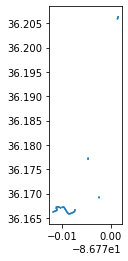

In [42]:
#plot(figsize = 17, 10)
slow_offpin_summer.plot()

<AxesSubplot:>

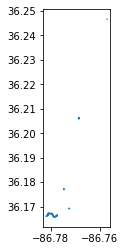

In [43]:
slow_offpin_inschool.plot()

In [50]:
stsparams = {
    'direction': '1',
    'startDate': '04-01-2022',
    'endDate' : '04-30-2022',
    'format' : 'geojson',
}

In [51]:
inbound23_sts_df = gpd.GeoDataFrame.from_features(requests.get(URL, params = stsparams, headers = headers).json()['features'])
inbound23_sts_df

,geometry,fromStopId,fromStopName,fromStopLoc,toStopId,toStopName,toStopLoc,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,numTrips,stopId,stopName,averageDwellSeconds
0,"LINESTRING (-86.76052 36.24425, -86.76033 36.2...",DWMRT,Dickerson Rd Wal Mart,"{'lat': 36.24425, 'lon': -86.76052}",DWMRTX,Dickerson Rd Walmart Exit,"{'lat': 36.24657, 'lon': -86.75708}",478.4,54.861911,8.720075,1832.0,NaN,NaN,NaN
1,"LINESTRING (-86.75708 36.24657, -86.75668 36.2...",DWMRTX,Dickerson Rd Walmart Exit,"{'lat': 36.24657, 'lon': -86.75708}",DICDOVSN,Dickerson Pike & Doverside Dr Sb,"{'lat': 36.24418, 'lon': -86.75659}",310.7,29.698873,10.461677,1832.0,NaN,NaN,NaN
2,"LINESTRING (-86.75659 36.24418, -86.75670 36.2...",DICDOVSN,Dickerson Pike & Doverside Dr Sb,"{'lat': 36.24418, 'lon': -86.75659}",DICMAPSF,Dickerson Pike & Maplewood Trace Sb,"{'lat': 36.23278, 'lon': -86.75876}",1289.6,111.954134,11.519003,1832.0,NaN,NaN,NaN
3,"LINESTRING (-86.75876 36.23278, -86.75944 36.2...",DICMAPSF,Dickerson Pike & Maplewood Trace Sb,"{'lat': 36.23278, 'lon': -86.75876}",DICEWISF,Dickerson Pike & Ewing Dr Sb,"{'lat': 36.22873, 'lon': -86.75944}",454.4,53.599952,8.477620,1832.0,NaN,NaN,NaN
4,"LINESTRING (-86.75944 36.22873, -86.75951 36.2...",DICEWISF,Dickerson Pike & Ewing Dr Sb,"{'lat': 36.22873, 'lon': -86.75944}",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,"{'lat': 36.22565, 'lon': -86.76032}",351.2,27.165058,12.928373,1832.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,POINT (-86.77457 36.17585),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1832.0,1SSPRSM,N 1st St & Spring St Sb,20.005797
59,POINT (-86.77396 36.17282),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1832.0,1SOLDSM,N 1st St & Oldham St Sb,4.838096
60,POINT (-86.77282 36.16886),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1832.0,WOON1SWF,Woodland St & N 1st St Wb,8.474444
61,POINT (-86.77756 36.16621),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1832.0,UNI2AWN,Union St & 2nd Ave Wb,23.343186


In [52]:
stop_details = inbound23_sts_df.tail(32)
stop_details = stop_details[['geometry', 'stopId', 'stopName', 'averageDwellSeconds']]
stop_details

,geometry,stopId,stopName,averageDwellSeconds
31,POINT (-86.76052 36.24425),DWMRT,Dickerson Rd Wal Mart,NaN
32,POINT (-86.75708 36.24657),DWMRTX,Dickerson Rd Walmart Exit,7.809624
33,POINT (-86.75659 36.24418),DICDOVSN,Dickerson Pike & Doverside Dr Sb,34.003145
34,POINT (-86.75876 36.23278),DICMAPSF,Dickerson Pike & Maplewood Trace Sb,15.138651
35,POINT (-86.75944 36.22873),DICEWISF,Dickerson Pike & Ewing Dr Sb,34.804831
36,POINT (-86.76032 36.22565),DICHILSF,Dickerson Pike & Hillhurst Dr Sb,3.804833
37,POINT (-86.76116 36.22325),DICSUNSN,Dickerson Pike & Sunset Cr Sb,15.311746
38,POINT (-86.76185 36.22131),DICPINSN,Dickerson Pike & Pine Ridge Dr Sb,14.294938
39,POINT (-86.76254 36.21935),DICALHSF,Dickerson Pike & Alhambra Cir Sb,3.392340
40,POINT (-86.76310 36.21775),DICLORSN,Dickerson Pk & Lorraine Ave Sb,4.371383


In [53]:
stop_details.loc[31, 'geometry'].x

-86.76052

In [44]:
slow_offpin_inschool_geojson = slow_offpin_inschool['geometry'].to_json()

In [45]:
slow_offpin_summer_geojson = slow_offpin_summer['geometry'].to_json()

In [47]:
all_offpin_summer_geojson = all_offpin_summer['geometry'].to_json()

In [49]:
offpin23_map = folium.Map(location =  [36.19, -86.7775], zoom_start = 13)
style1 = {'color': 'red', 'weight' :6}
folium.GeoJson(slow_offpin_inschool_geojson, style_function=lambda x: style1).add_to(offpin23_map)
style2 = {'color': 'blue', 'weight' :3}
folium.GeoJson(slow_offpin_summer_geojson, style_function=lambda x: style2).add_to(offpin23_map)
style3 = {'color': 'gray', 'weight' :1}
folium.GeoJson(all_offpin_summer_geojson, style_function=lambda x: style3).add_to(offpin23_map)
offpin23_map

In [54]:
slow_offpin_inschool.to_file("../data/slow_offpin_inschool.geojson", driver = "GeoJSON")

C:\Users\dada2\anaconda3\envs\geospatial\lib\site-packages\geopandas\io\file.py:234: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [55]:
slow_offpin_summer.to_file("../data/slow_offpin_summer.geojson", driver = "GeoJSON")